In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
london_summary_df = pd.read_excel('london_summary.xlsx')





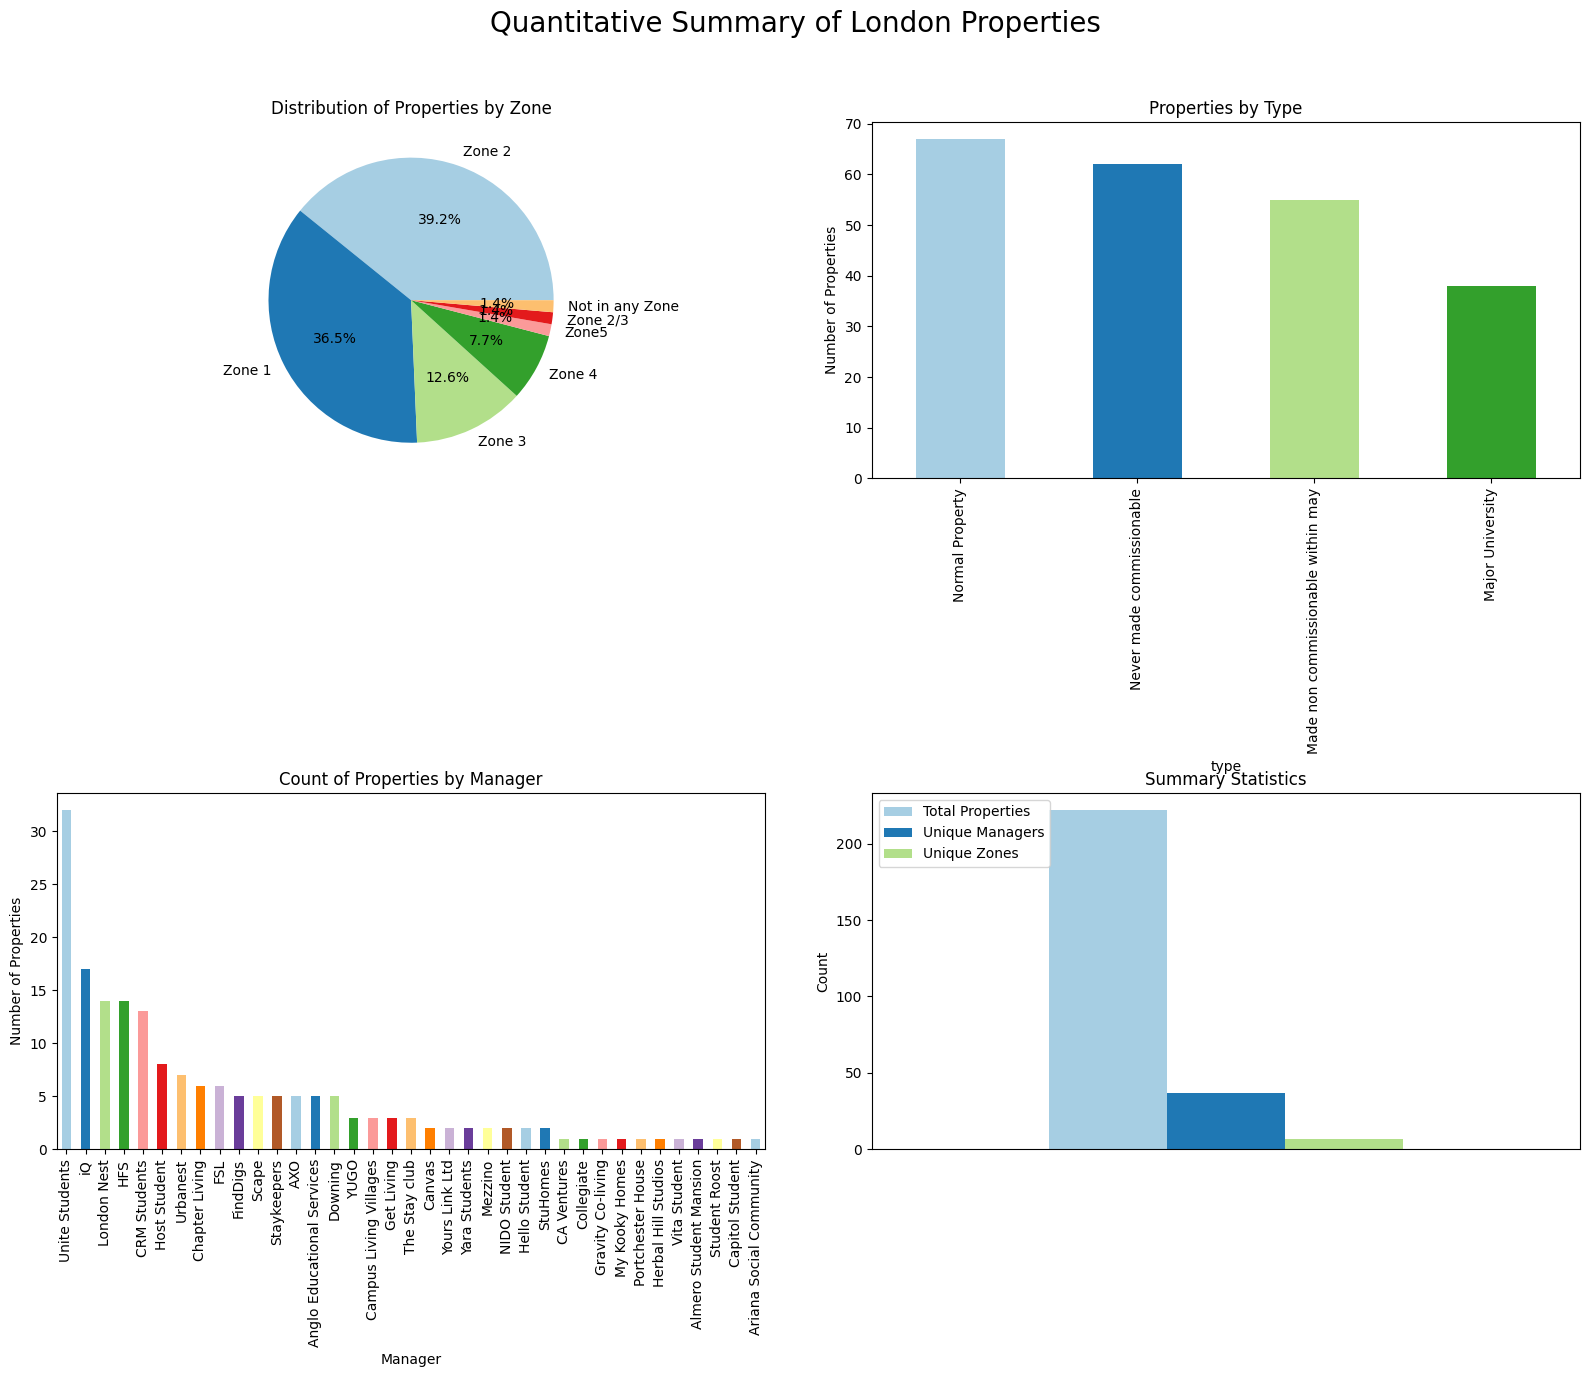

In [6]:
import matplotlib.pyplot as plt

# Set up the plots
fig, ax = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle("Quantitative Summary of London Properties", fontsize=20)

# Plot 1: Distribution of Properties by Zone
london_summary_df['zone'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[0,0], colors=plt.cm.Paired.colors)
ax[0,0].set_title('Distribution of Properties by Zone')
ax[0,0].set_ylabel('')

# Plot 2: Properties by Type
london_summary_df['type'].value_counts().plot(kind='bar', ax=ax[0,1], color=plt.cm.Paired.colors)
ax[0,1].set_title('Properties by Type')
ax[0,1].set_ylabel('Number of Properties')

# Plot 3: Count of Properties by Manager
london_summary_df['manager'].value_counts().plot(kind='bar', ax=ax[1,0], color=plt.cm.Paired.colors)
ax[1,0].set_title('Count of Properties by Manager')
ax[1,0].set_ylabel('Number of Properties')
ax[1,0].set_xlabel('Manager')

# Plot 4: Summary Statistics
summary_data = {
    'Total Properties': [london_summary_df.shape[0]],
    'Unique Managers': [london_summary_df['manager'].nunique()],
    'Unique Zones': [london_summary_df['zone'].nunique()]
}
summary_df = pd.DataFrame(summary_data)
summary_df.plot(kind='bar', ax=ax[1,1], legend=True, color=plt.cm.Paired.colors)
ax[1,1].set_title('Summary Statistics')
ax[1,1].set_ylabel('Count')
ax[1,1].set_xticks([])
ax[1,1].legend(loc='upper left')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()


In [8]:
# Load the data from the provided file
data_summary = pd.read_excel('london_summary.xlsx')

# Display the first few rows of the data to inspect column names and structure
data_summary.head()


,id,name,longitude,latitude,manager,type,zone
0,121,"Fulham Palace Studio, London Nest",-0.220811,51.485133,London Nest,Never made commissionable,Zone 2
1,122,"AXO Islington, London Nest",-0.122577,51.560156,London Nest,Never made commissionable,Zone 2
2,123,"AXO Camden, London Nest",-0.124493,51.560156,London Nest,Never made commissionable,Zone 2
3,124,"Chapter Portobello, London Nest",-0.212009,51.526195,London Nest,Never made commissionable,Zone 2
4,125,"The Collective Old Oak, London Nest",-0.252591,51.528889,London Nest,Never made commissionable,Zone 3


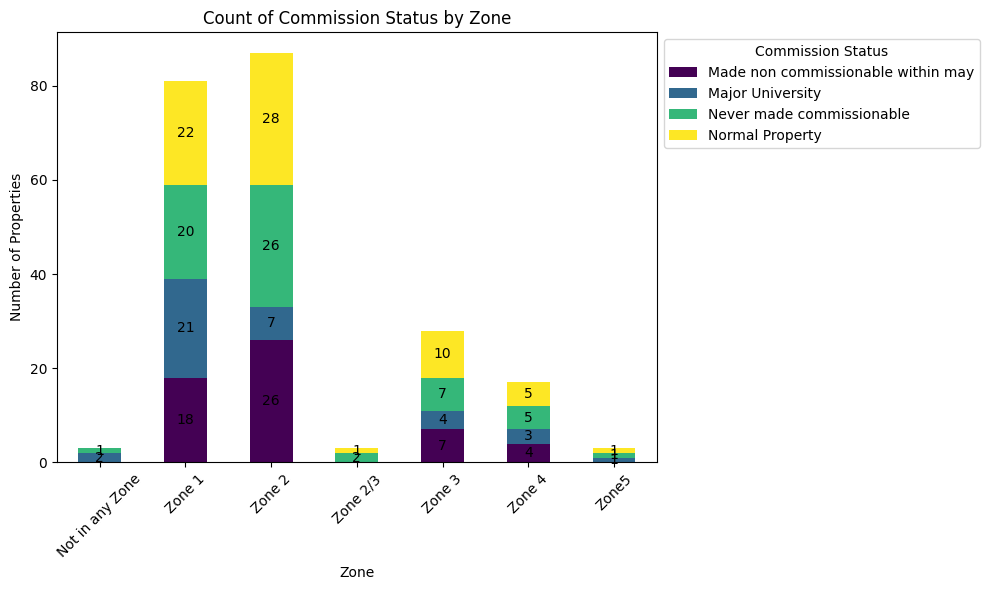

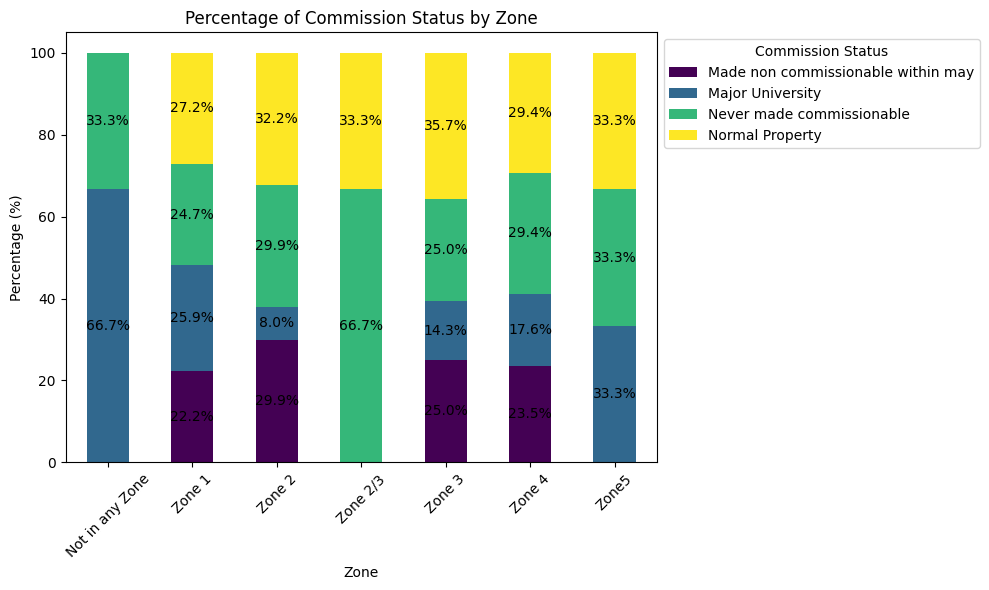

In [9]:
# Group by "zone" and "type" to get the counts of each commission status for every zone
commission_summary = data_summary.groupby(['zone', 'type']).size().unstack().fillna(0)

# Calculate the percentages of each commission status in each zone
commission_percentages = commission_summary.divide(commission_summary.sum(axis=1), axis=0) * 100

# Plot the counts using a stacked bar graph
ax = commission_summary.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")
plt.title('Count of Commission Status by Zone')
plt.ylabel('Number of Properties')
plt.xlabel('Zone')
plt.legend(title='Commission Status', loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=45)

# Add data labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0:
        ax.text(x + width/2, 
                y + height/2, 
                '{:.0f}'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')

plt.tight_layout()
plt.show()

# Plot the percentages using a stacked bar graph
ax2 = commission_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")
plt.title('Percentage of Commission Status by Zone')
plt.ylabel('Percentage (%)')
plt.xlabel('Zone')
plt.legend(title='Commission Status', loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=45)

# Add data labels
for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 1:  # Only add labels for percentages > 1% for clarity
        ax2.text(x + width/2, 
                 y + height/2, 
                 '{:.1f}%'.format(height), 
                 horizontalalignment='center', 
                 verticalalignment='center')

plt.tight_layout()
plt.show()


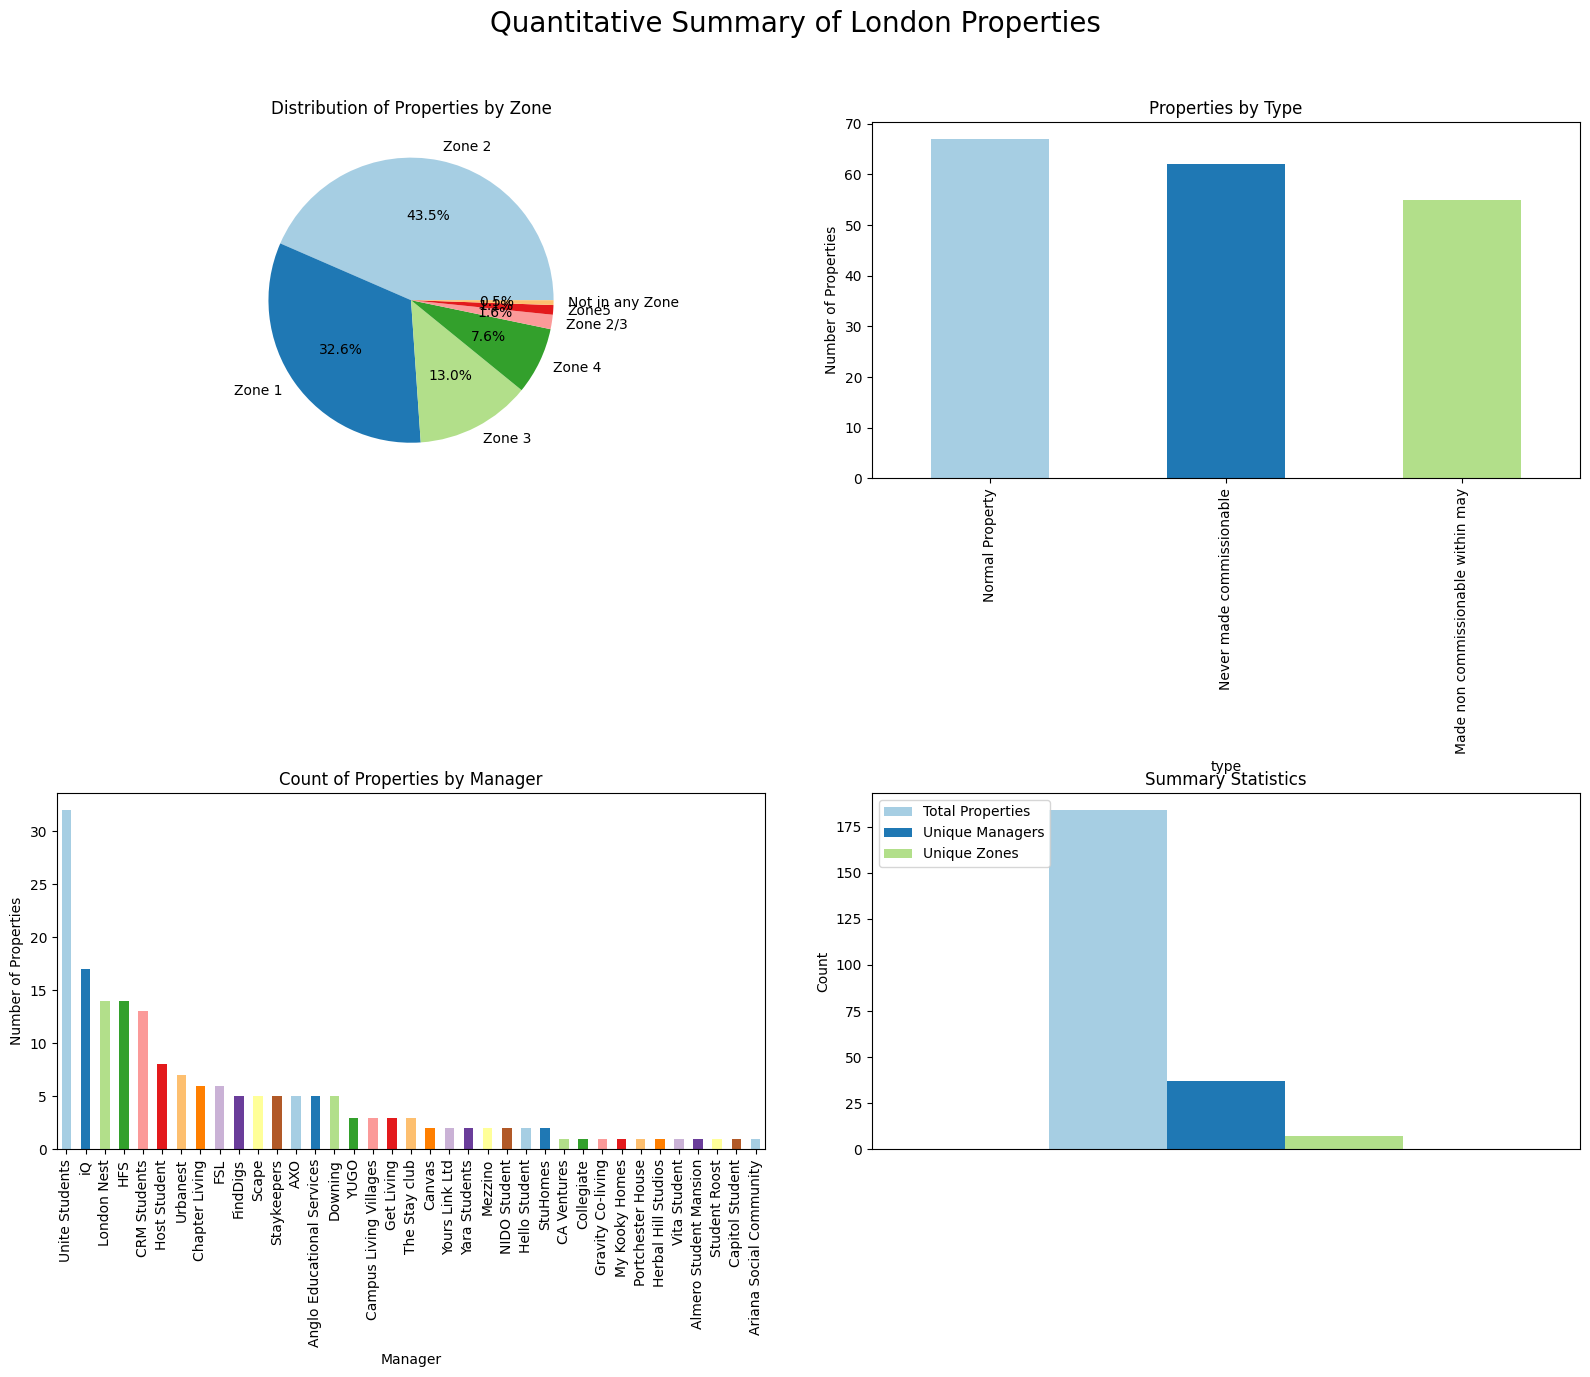

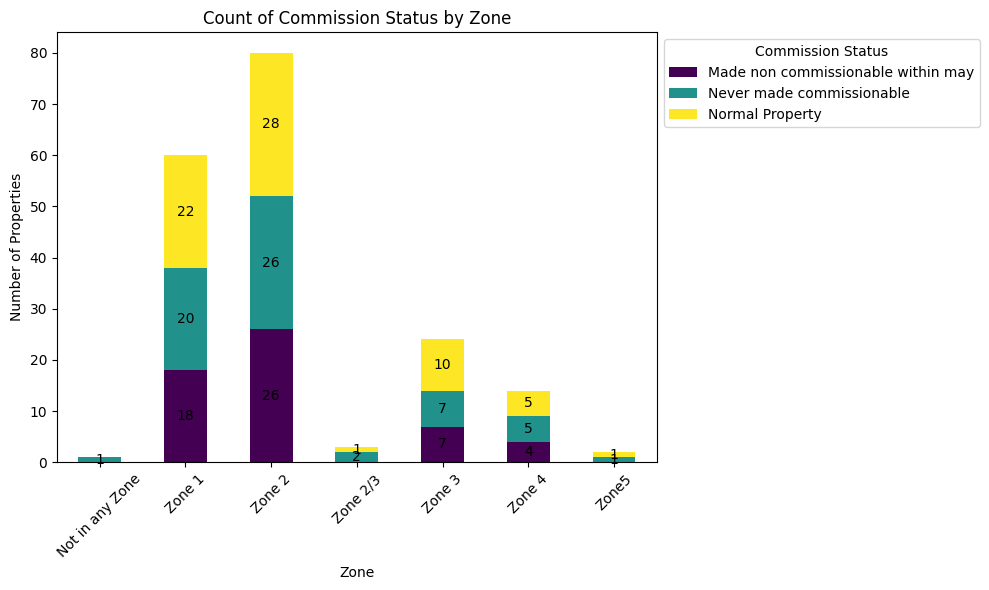

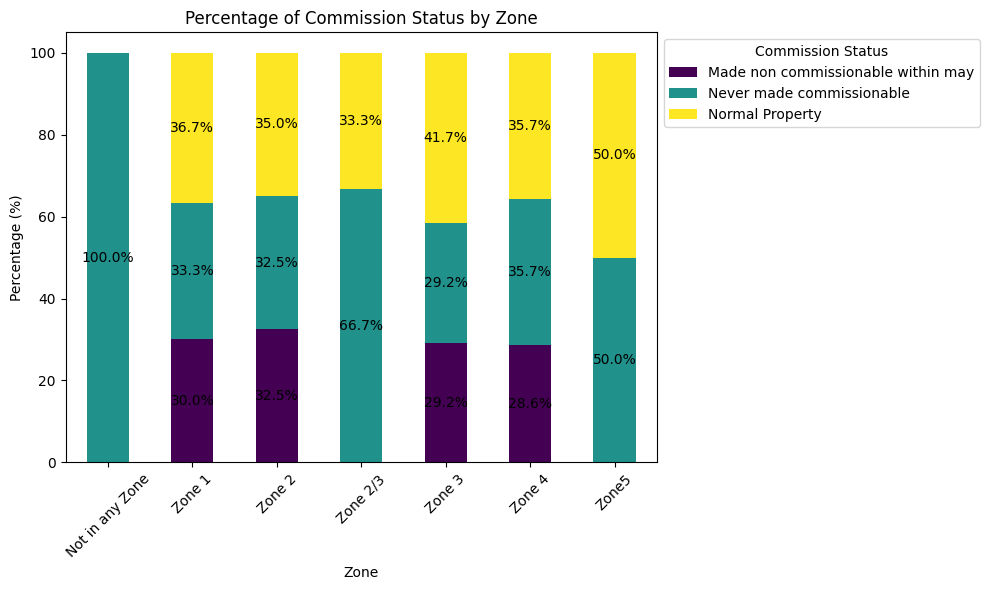

In [12]:
import matplotlib.pyplot as plt
# Load the data
london_summary_df_updated = pd.read_excel("london_summary.xlsx")

# Exclude properties managed by "Major Universities"
london_summary_filtered = london_summary_df_updated[london_summary_df_updated['manager'] != 'Major University']

# Set up the plots
fig, ax = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle("Quantitative Summary of London Properties", fontsize=20)

# Plot 1: Distribution of Properties by Zone
london_summary_filtered['zone'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[0,0], colors=plt.cm.Paired.colors)
ax[0,0].set_title('Distribution of Properties by Zone')
ax[0,0].set_ylabel('')

# Plot 2: Properties by Type
london_summary_filtered['type'].value_counts().plot(kind='bar', ax=ax[0,1], color=plt.cm.Paired.colors)
ax[0,1].set_title('Properties by Type')
ax[0,1].set_ylabel('Number of Properties')

# Plot 3: Count of Properties by Manager
london_summary_filtered['manager'].value_counts().plot(kind='bar', ax=ax[1,0], color=plt.cm.Paired.colors)
ax[1,0].set_title('Count of Properties by Manager')
ax[1,0].set_ylabel('Number of Properties')
ax[1,0].set_xlabel('Manager')

# Plot 4: Summary Statistics
summary_data = {
    'Total Properties': [london_summary_filtered.shape[0]],
    'Unique Managers': [london_summary_filtered['manager'].nunique()],
    'Unique Zones': [london_summary_filtered['zone'].nunique()]
}
summary_df = pd.DataFrame(summary_data)
summary_df.plot(kind='bar', ax=ax[1,1], legend=True, color=plt.cm.Paired.colors)
ax[1,1].set_title('Summary Statistics')
ax[1,1].set_ylabel('Count')
ax[1,1].set_xticks([])
ax[1,1].legend(loc='upper left')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.90)

# Group by "zone" and "type" to get the counts of each commission status for every zone
commission_summary = london_summary_filtered.groupby(['zone', 'type']).size().unstack().fillna(0)

# Calculate the percentages of each commission status in each zone
commission_percentages = commission_summary.divide(commission_summary.sum(axis=1), axis=0) * 100

# Plot the counts using a stacked bar graph
ax_commission = commission_summary.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")
plt.title('Count of Commission Status by Zone')
plt.ylabel('Number of Properties')
plt.xlabel('Zone')
plt.legend(title='Commission Status', loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=45)

# Add data labels
for p in ax_commission.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0:
        ax_commission.text(x + width/2, 
                y + height/2, 
                '{:.0f}'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')

plt.tight_layout()
plt.show()

# Plot the percentages using a stacked bar graph
ax2_commission = commission_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")
plt.title('Percentage of Commission Status by Zone')
plt.ylabel('Percentage (%)')
plt.xlabel('Zone')
plt.legend(title='Commission Status', loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=45)

# Add data labels
for p in ax2_commission.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 1:  # Only add labels for percentages > 1% for clarity
        ax2_commission.text(x + width/2, 
                 y + height/2, 
                 '{:.1f}%'.format(height), 
                 horizontalalignment='center', 
                 verticalalignment='center')

plt.tight_layout()
plt.show()
